In [1]:
import gpflow
from gpflow.inducing_variables import SharedIndependentInducingVariables, InducingPoints
import gpflux2 as gpflux
from gpflux2.helpers import construct_basic_kernel, construct_basic_inducing_variables
from gpflux2.initializers import ZeroInitializer
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from plotting import plot_layers

In [2]:
Ns = 1000
D = 1
a, b = 0, 1
X = np.linspace(a, b, 1000).reshape(-1, 1)

In [3]:
def init_layer(layer):
    layer.q_mu.assign(np.zeros_like(layer.q_mu.value()))
    layer.q_sqrt.assign(np.eye(layer.q_sqrt.shape[1])[np.newaxis])

In [4]:
# Layer 1
Z1 = X.copy()
feat1 = SharedIndependentInducingVariables(InducingPoints(Z1))
kern1 = construct_basic_kernel(gpflow.kernels.SquaredExponential(lengthscale=0.15),
                               output_dim=D, share_hyperparams=True)
layer1 = gpflux.layers.GPLayer(kern1, feat1, initializer=None)
init_layer(layer1)

# Layer 2
Z2 = X.copy()
feat2 = SharedIndependentInducingVariables(InducingPoints(Z2))
kern2 = construct_basic_kernel(gpflow.kernels.SquaredExponential(lengthscale=0.8, variance=0.1),
                               output_dim=D, share_hyperparams=True)
layer2 = gpflux.layers.GPLayer(kern2, feat2, initializer=None)
init_layer(layer2)

# Layer 3
Z3 = X.copy()
feat3 = SharedIndependentInducingVariables(InducingPoints(Z3))
kern3 = construct_basic_kernel(gpflow.kernels.SquaredExponential(lengthscale=0.3, variance=0.1),
                               output_dim=D, share_hyperparams=True)
layer3 = gpflux.layers.GPLayer(kern3, feat3, initializer=None)
init_layer(layer3)

gp_layers = [layer1, layer2, layer3]

In [5]:
# model = gpflux.DeepGP(np.empty((1, 1)), np.empty((1, 1)), [layer1, layer2, layer3])

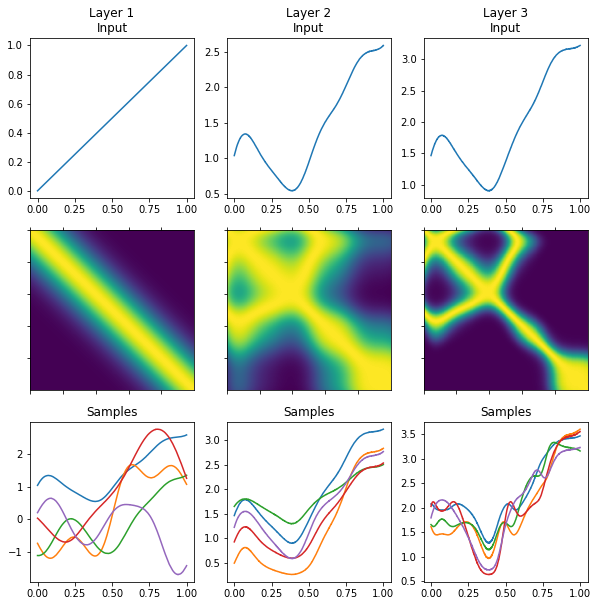

In [10]:
plot_layers(X, gp_layers)

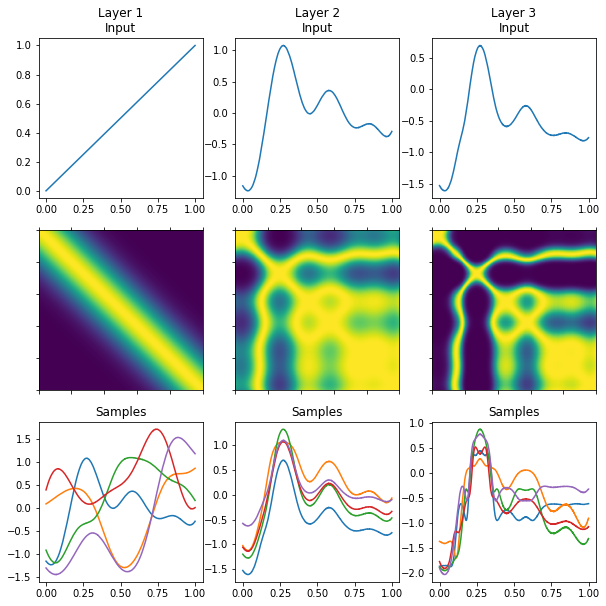

In [4]:
#plot_layers(X, model)
#plt.show()